In [ ]:
#Đọc dữ liệu
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Cheeseju/KPDL/main/college_student_placement_dataset.csv")

print("Số dòng của DataFrame:", len(df))

df.head()

Số dòng của DataFrame: 10000


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
print("Kích thước dữ liệu ban đầu:", df.shape)

Kích thước dữ liệu ban đầu: (10000, 10)


In [ ]:
# Kiểm tra thông tin sơ bộ của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
print("Thống kê mô tả các biến số:")
df.describe()

Thống kê mô tả các biến số:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


#2. Tiền xử lý dữ liệu


## 2.1. Kiểm tra và Đánh giá Dữ liệu Ban đầu

In [ ]:
# Kiểm tra giá trị thiếu
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
# Kiểm tra giá trị trùng lặp
duplicates = df.duplicated().sum()
print(f"\nSố lượng mẫu trùng lặp: {duplicates}")


Số lượng mẫu trùng lặp: 0


## 2.2. Phân tích tính cân bằng của biến mục tiêu

In [ ]:
# Phân tích mức độ cân bằng của biến mục tiêu
placement_distribution = df['Placement'].value_counts(normalize=True)
print("Phân phối của biến mục tiêu 'Placement':")
print(placement_distribution)

Phân phối của biến mục tiêu 'Placement':
Placement
No     0.8341
Yes    0.1659
Name: proportion, dtype: float64


/tmp/ipython-input-3725058026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Placement', data=df, palette='Set2')


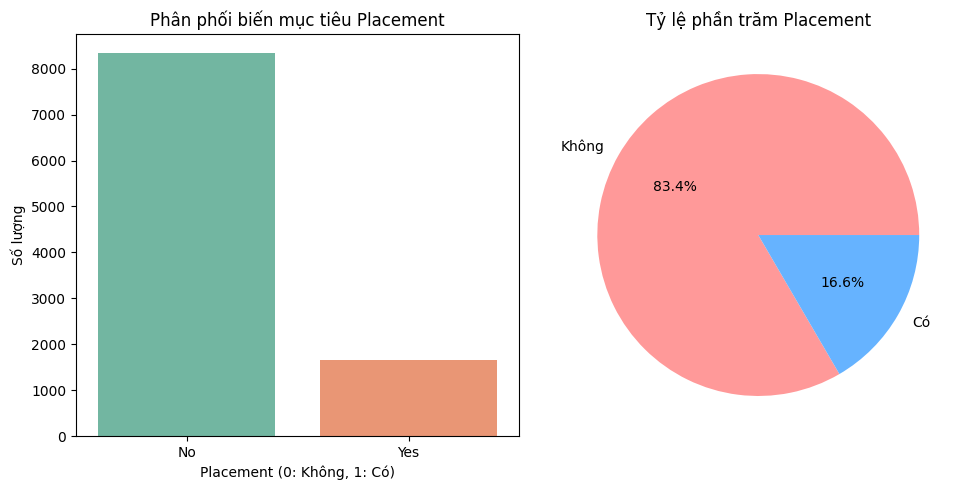

In [ ]:
# Trực quan hóa bằng biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Placement', data=df, palette='Set2')
plt.title('Phân phối biến mục tiêu Placement')
plt.xlabel('Placement (0: Không, 1: Có)')
plt.ylabel('Số lượng')

plt.subplot(1, 2, 2)
plt.pie(placement_distribution.values, labels=['Không', 'Có'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ phần trăm Placement')

plt.tight_layout()
plt.show()

## 2.3. Mã hóa biến phân loại

In [ ]:
# Mã hóa biến mục tiêu 'Placement' (Yes/No) thành (1/0)
print("Phân phối gốc của biến Placement:")
print(df['Placement'].value_counts())

df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

Phân phối gốc của biến Placement:
Placement
No     8341
Yes    1659
Name: count, dtype: int64


In [ ]:
# Mã hóa biến 'Internship_Experience' (Yes/No) thành (1/0)
print("\nPhân phối gốc của biến Internship_Experience:")
print(df['Internship_Experience'].value_counts())

df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})


Phân phối gốc của biến Internship_Experience:
Internship_Experience
No     6036
Yes    3964
Name: count, dtype: int64


In [ ]:
# Loại bỏ cột ID không cần thiết
df.drop('College_ID', axis=1, inplace=True)

In [ ]:
#In dữ liệu sau mã hóa và loại bỏ cột không cần thiết
print("\nDữ liệu sau khi mã hóa:")
df.head(5)


Dữ liệu sau khi mã hóa:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [ ]:
print("\nKiểu dữ liệu sau khi mã hóa:")
df.dtypes


Kiểu dữ liệu sau khi mã hóa:


,0
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,int64
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,int64


## 2.4. Phân tích đặc trưng và tương quan

In [ ]:
# Phân tích thống kê mô tả
numerical_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Extra_Curricular_Score',
                  'Projects_Completed', 'Academic_Performance', 'Communication_Skills']
categorical_cols = ['Internship_Experience']
print("Thống kê mô tả các biến số:")
df.describe()

Thống kê mô tả các biến số:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


from matplotlib import pyplot as plt
_df_0['IQ'].plot(kind='hist', bins=20, title='IQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Prev_Sem_Result'].plot(kind='hist', bins=20, title='Prev_Sem_Result')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CGPA'].plot(kind='hist', bins=20, title='CGPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Academic_Performance'].plot(kind='hist', bins=20, title='Academic_Performance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='IQ', y='Prev_Sem_Result', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Prev_Sem_Result', y='CGPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='CGPA', y='Academic_Performance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Academic_Performance', y='Internship_Experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['IQ'].plot(kind='line', figsize=(8, 4), title='IQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Prev_Sem_Result'].plot(kind='line', figsize=(8, 4), title='Prev_Sem_Result')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['CGPA'].plot(kind='line', figsize=(8, 4), title='CGPA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Academic_Performance'].plot(kind='line', figsize=(8, 4), title='Academic_Performance')
plt.gca().spines[['top', 'right']].set_visible(False)

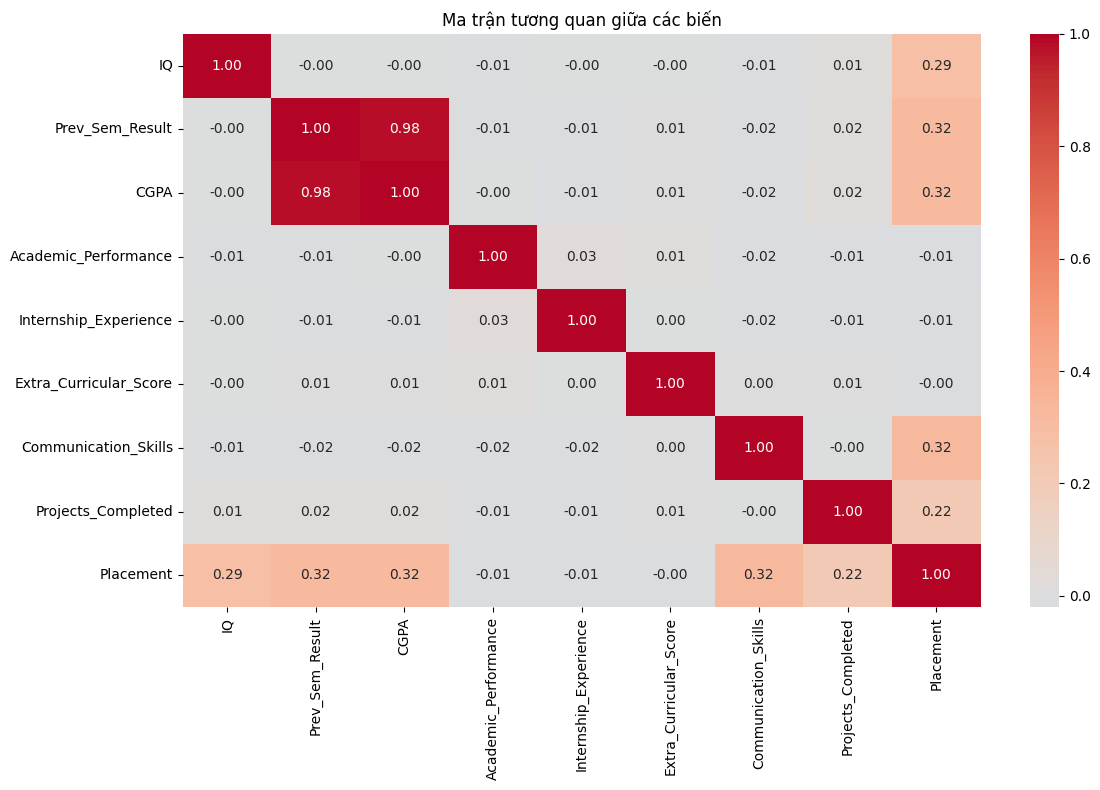

In [ ]:
# Phân tích tương quan
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.tight_layout()
plt.show()


## 2.5. Chuẩn hóa dữ liệu

In [ ]:
# Phân chia features và target trước khi chuẩn hóa
X = df.drop('Placement', axis=1)
y = df['Placement']

In [ ]:
# Chia tập train/test trước khi chuẩn hóa
from sklearn.model_selection import train_test_split
from collections import Counter
# Chia tập train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Kích thước các tập dữ liệu:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print("Số lượng mẫu trong tập huấn luyện ban đầu:", Counter(y_train))


Kích thước các tập dữ liệu:
Train: (8000, 8), Test: (2000, 8)
Số lượng mẫu trong tập huấn luyện ban đầu: Counter({0: 6673, 1: 1327})


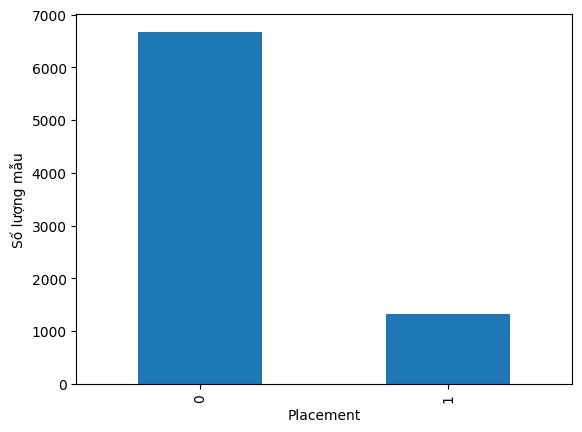

In [ ]:
#Trực quan sự phân bổ của mẫu trong tập huấn luyện ban đầu trước khi SMOTE
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Số lượng mẫu')
plt.xlabel('Placement')
plt.show()

In [ ]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Chỉ fit scaler trên tập train
X_train_numerical = X_train[numerical_cols]
scaler.fit(X_train_numerical)

# Transform trên cả train và test
X_train_scaled = scaler.transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Tạo DataFrames từ dữ liệu đã chuẩn hóa
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)
X_train_final = pd.concat([X_train_scaled_df, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[categorical_cols]], axis=1)



In [ ]:
print("Dữ liệu tập train sau khi chuẩn hóa:")
X_train_final.head(5)

Dữ liệu tập train sau khi chuẩn hóa:


,IQ,Prev_Sem_Result,CGPA,Extra_Curricular_Score,Projects_Completed,Academic_Performance,Communication_Skills,Internship_Experience
7841,-0.431454,-0.892559,-0.794190,-0.301619,0.288106,0.154948,-1.226792,0
6159,-1.554192,1.096493,1.365061,0.332784,-1.459756,0.154948,1.524441,0
191,0.823372,-1.009968,-0.902832,-0.618820,0.288106,1.201596,-0.882888,1
321,0.559198,-1.679892,-1.432459,-0.301619,-0.877135,1.550479,0.492729,1
6714,-1.950453,1.352031,1.629875,0.015583,0.288106,0.154948,-0.538984,0


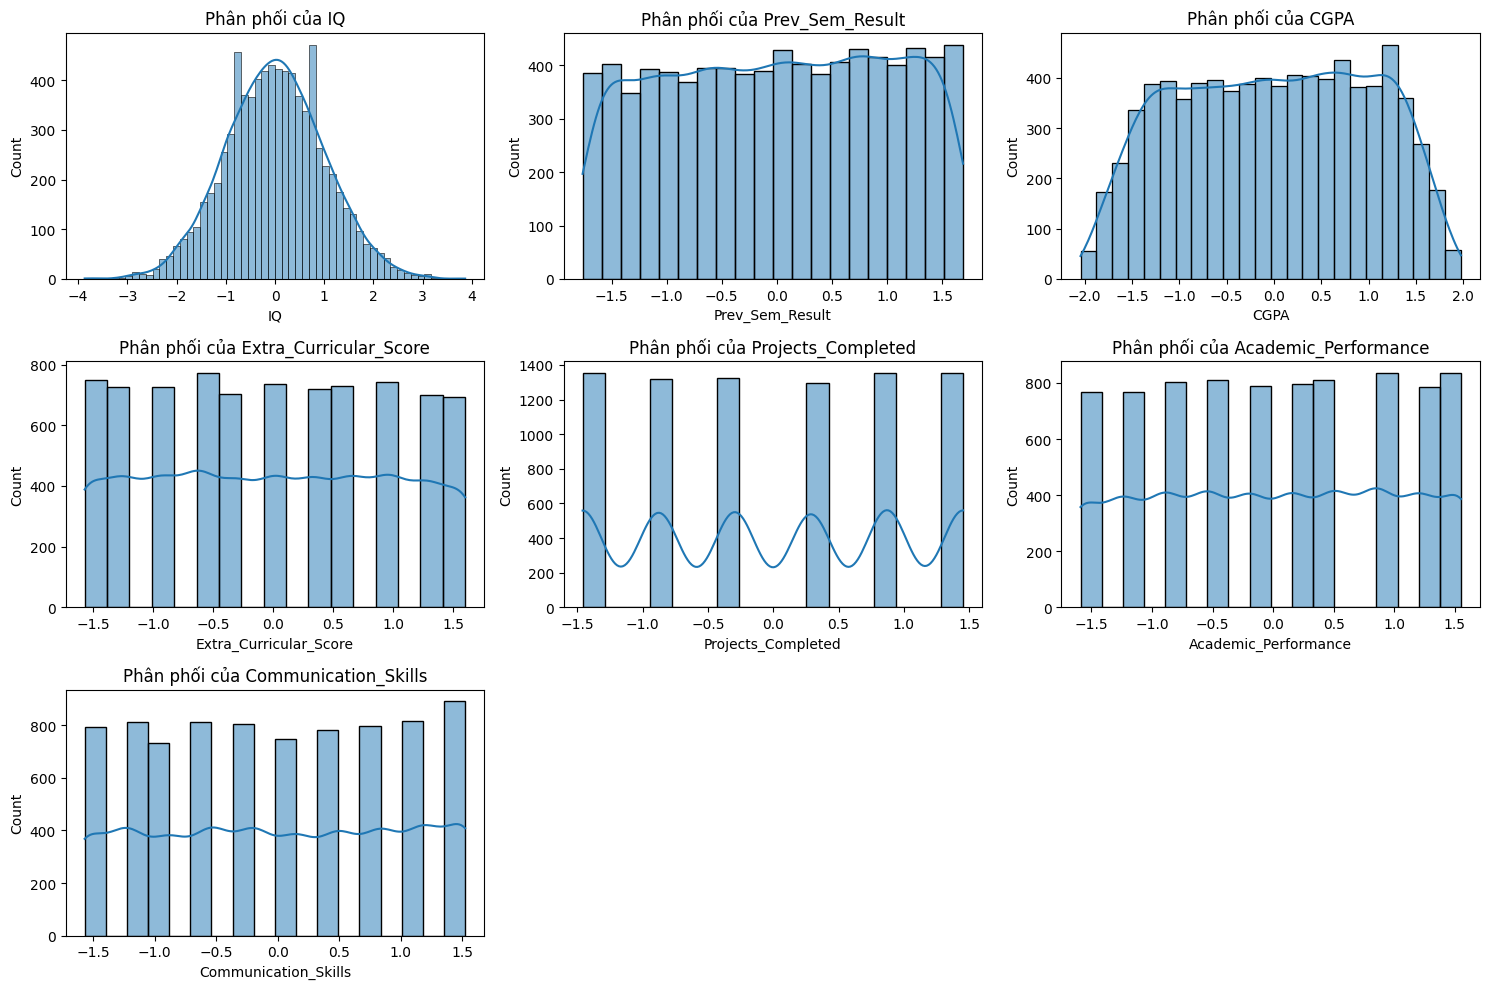

In [ ]:
# Kiểm tra phân phối trước khi chuẩn hóa
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_train_final[col], kde=True)
    plt.title(f'Phân phối của {col}')
plt.tight_layout()
plt.show()

## 2.6. Xử lý mất cân bằng dữ liệu

In [ ]:

# Xử lý mất cân bằng dữ liệu chỉ trên tập train
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)

print("\nSau khi áp dụng SMOTE:")
print("Số lượng mẫu trong tập huấn luyện sau khi dùng SMOTE:", Counter(y_train_smote))
print(f"Kích thước tập train: {X_train_smote.shape}")
print("Phân phối lớp trong tập train:")
print(pd.Series(y_train_smote).value_counts(normalize=True))


Sau khi áp dụng SMOTE:
Số lượng mẫu trong tập huấn luyện sau khi dùng SMOTE: Counter({0: 6673, 1: 3336})
Kích thước tập train: (10009, 8)
Phân phối lớp trong tập train:
Placement
0    0.6667
1    0.3333
Name: proportion, dtype: float64


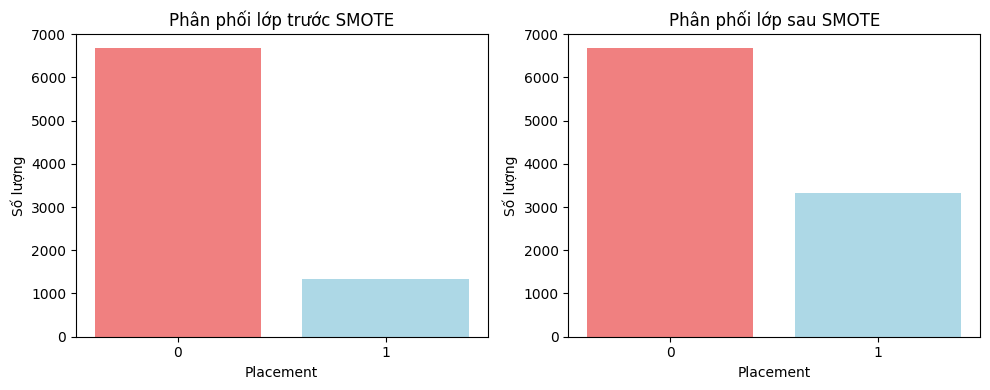

In [ ]:
# Trực quan hóa kết quả
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
original_counts = pd.Series(y_train).value_counts()
plt.bar(['0', '1'], original_counts.values, color=['lightcoral', 'lightblue'])
plt.title('Phân phối lớp trước SMOTE')
plt.ylabel('Số lượng')
plt.xlabel('Placement')

plt.subplot(1, 2, 2)
smote_counts = pd.Series(y_train_smote).value_counts()
plt.bar(['0', '1'], smote_counts.values, color=['lightcoral', 'lightblue'])
plt.title('Phân phối lớp sau SMOTE')
plt.ylabel('Số lượng')
plt.xlabel('Placement')

plt.tight_layout()
plt.show()

# 3. XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH

## 3.1. Huấn luyện và đánh giá mô hình Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Khởi tạo và huấn luyện mô hình
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train_smote, y_train_smote)

# Dự đoán trên tập test
y_pred_dt = dt_model.predict(X_test_final)
y_prob_dt = dt_model.predict_proba(X_test_final)[:, 1]

# Đánh giá
print(" ĐÁNH GIÁ DECISION TREE TRÊN TẬP TEST ")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

 ĐÁNH GIÁ DECISION TREE TRÊN TẬP TEST 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1668
           1       0.86      0.95      0.90       332

    accuracy                           0.96      2000
   macro avg       0.92      0.96      0.94      2000
weighted avg       0.97      0.96      0.97      2000



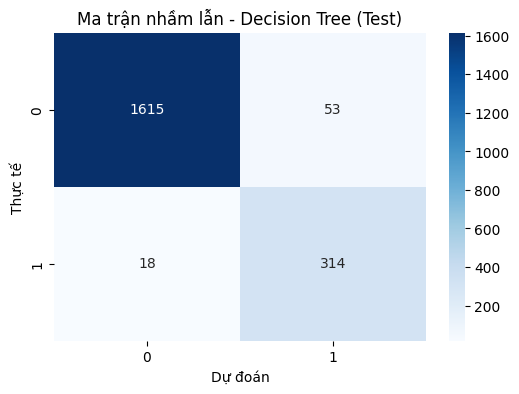

In [ ]:
# Ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',)
plt.title('Ma trận nhầm lẫn - Decision Tree (Test)')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

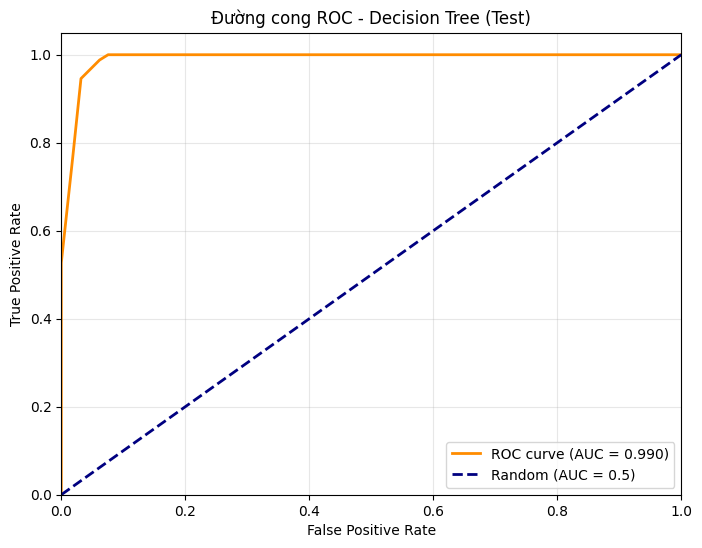

AUC Score: 0.9905


In [ ]:
# Đường cong ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - Decision Tree (Test)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score: {roc_auc_dt:.4f}")

## 3.2 Rừng ngẫu nhiên (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện mô hình
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Dự đoán trên tập test
y_pred_rf = rf_model.predict(X_test_final)
y_prob_rf = rf_model.predict_proba(X_test_final)[:, 1]

# Đánh giá
print("ĐÁNH GIÁ RANDOM FOREST TRÊN TẬP TEST")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

ĐÁNH GIÁ RANDOM FOREST TRÊN TẬP TEST
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      0.99      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



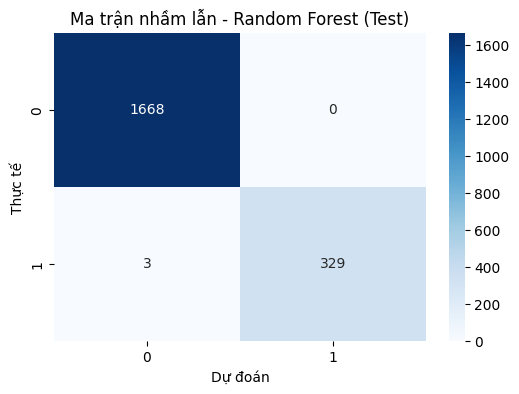

In [ ]:
# Ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',)
plt.title('Ma trận nhầm lẫn - Random Forest (Test)')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

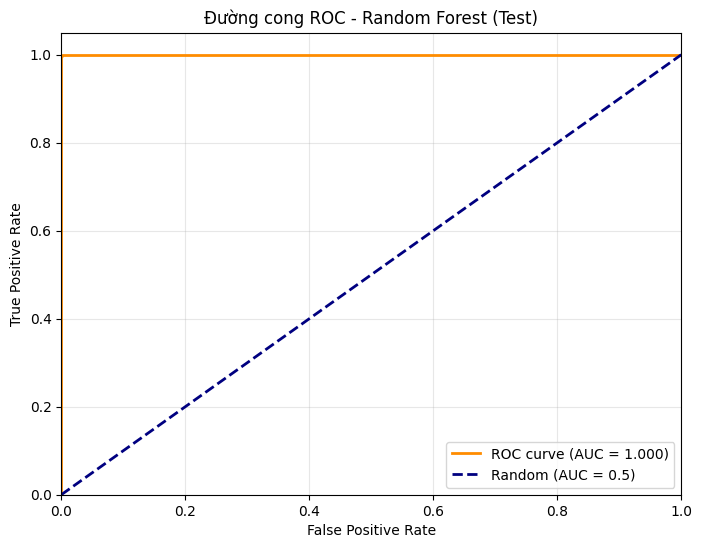

AUC Score: 1.0000


In [ ]:
# Đường cong ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - Random Forest (Test)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score: {roc_auc_rf:.4f}")


## 3.3 Mô hình GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo và huấn luyện mô hình
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

# Dự đoán
y_pred_gb = gb_model.predict(X_test_final)
y_prob_gb = gb_model.predict_proba(X_test_final)[:, 1]

# Đánh giá
print(" ĐÁNH GIÁ GRADIENT BOOSTING")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

 ĐÁNH GIÁ GRADIENT BOOSTING
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



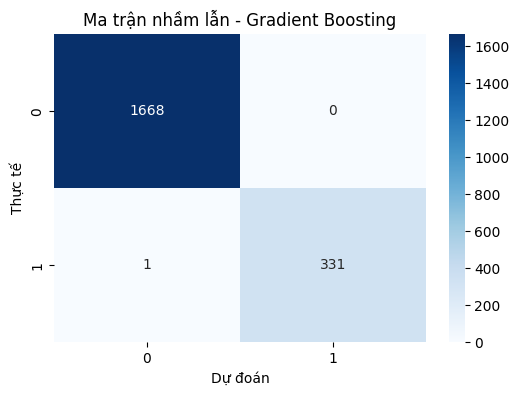

In [ ]:
# Ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',)
plt.title('Ma trận nhầm lẫn - Gradient Boosting')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

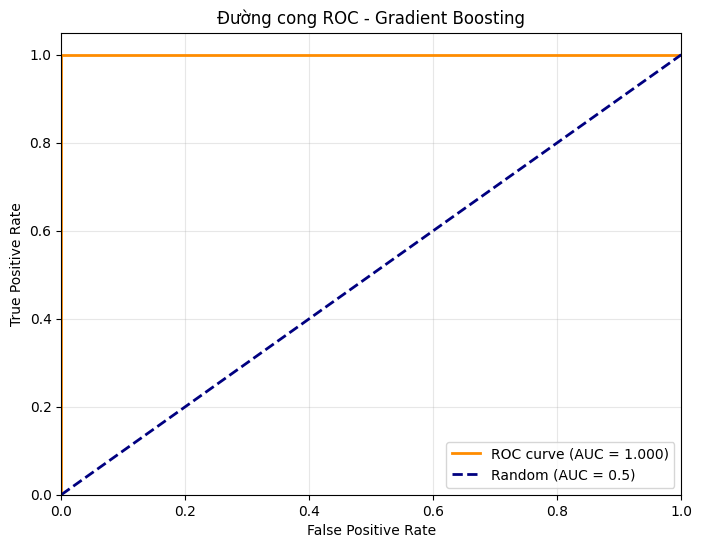

AUC Score: 1.0000


In [ ]:
# Đường cong ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score: {roc_auc_gb:.4f}")

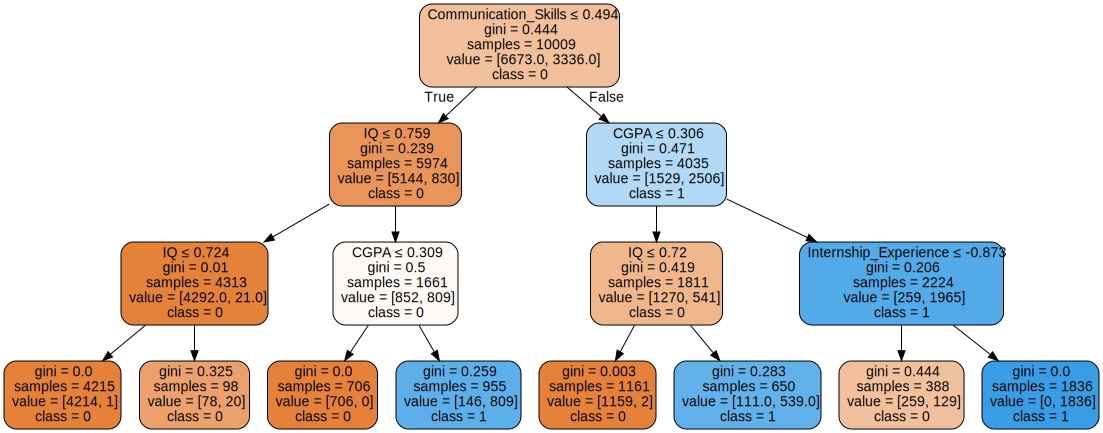

In [ ]:
# Huấn luyện mô hình Naive Bayes:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['0','1'],
    filled= True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
# Dự đoán trên tập test
y_pred_nb = dt_model.predict(X_test_final)
y_prob_nb = dt_model.predict_proba(X_test_final)[:, 1]

# Đánh giá
print(" ĐÁNH GIÁ Navie Bayes TREE TRÊN TẬP TEST ")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

 ĐÁNH GIÁ Navie Bayes TREE TRÊN TẬP TEST 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1668
           1       0.86      0.95      0.90       332

    accuracy                           0.96      2000
   macro avg       0.92      0.96      0.94      2000
weighted avg       0.97      0.96      0.97      2000



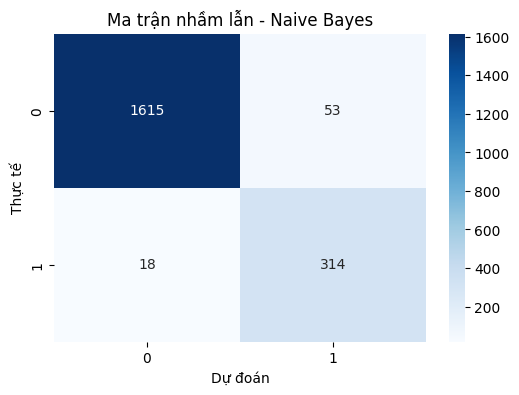

In [ ]:
# Ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',)
plt.title('Ma trận nhầm lẫn - Naive Bayes')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

In [ ]:
# So sánh kết quả
models_comparison = {
    'Decision Tree': roc_auc_dt,
    'Random Forest': roc_auc_rf,
    'Gradient Boosting': roc_auc_gb,
    'Naive Bayes': roc_auc_nb
}

# Tạo dataframe so sánh
comparison_df = pd.DataFrame(list(models_comparison.items()), columns=['Model', 'AUC Score'])
comparison_df = comparison_df.sort_values('AUC Score', ascending=False)

print("So sánh hiệu suất các mô hình:")
print(comparison_df)



So sánh hiệu suất các mô hình:
               Model  AUC Score
2  Gradient Boosting   1.000000
1      Random Forest   0.999996
0      Decision Tree   0.990487
3        Naive Bayes   0.990487


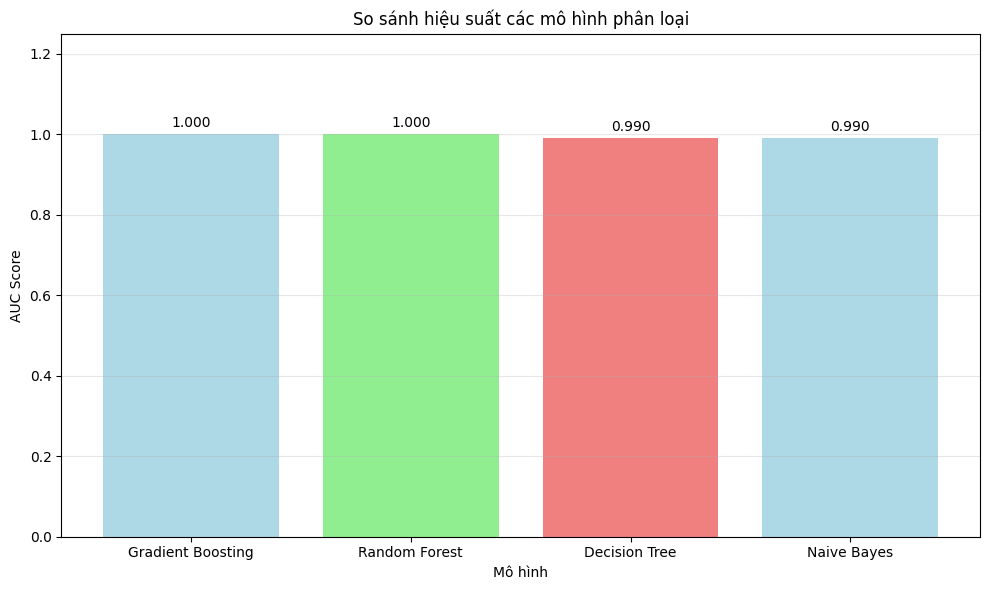


Mô hình tốt nhất: Gradient Boosting với AUC = 1.0000


In [ ]:
# Trực quan hóa so sánh
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral']
bars = plt.bar(comparison_df['Model'], comparison_df['AUC Score'], color=colors)
plt.xlabel('Mô hình')
plt.ylabel('AUC Score')
plt.title('So sánh hiệu suất các mô hình phân loại')
plt.ylim(0, 1.25)

# Thêm giá trị trên các cột
for bar, value in zip(bars, comparison_df['AUC Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Chọn mô hình tốt nhất
best_model_name = comparison_df.iloc[0]['Model']
best_model_auc = comparison_df.iloc[0]['AUC Score']
print(f"\nMô hình tốt nhất: {best_model_name} với AUC = {best_model_auc:.4f}")

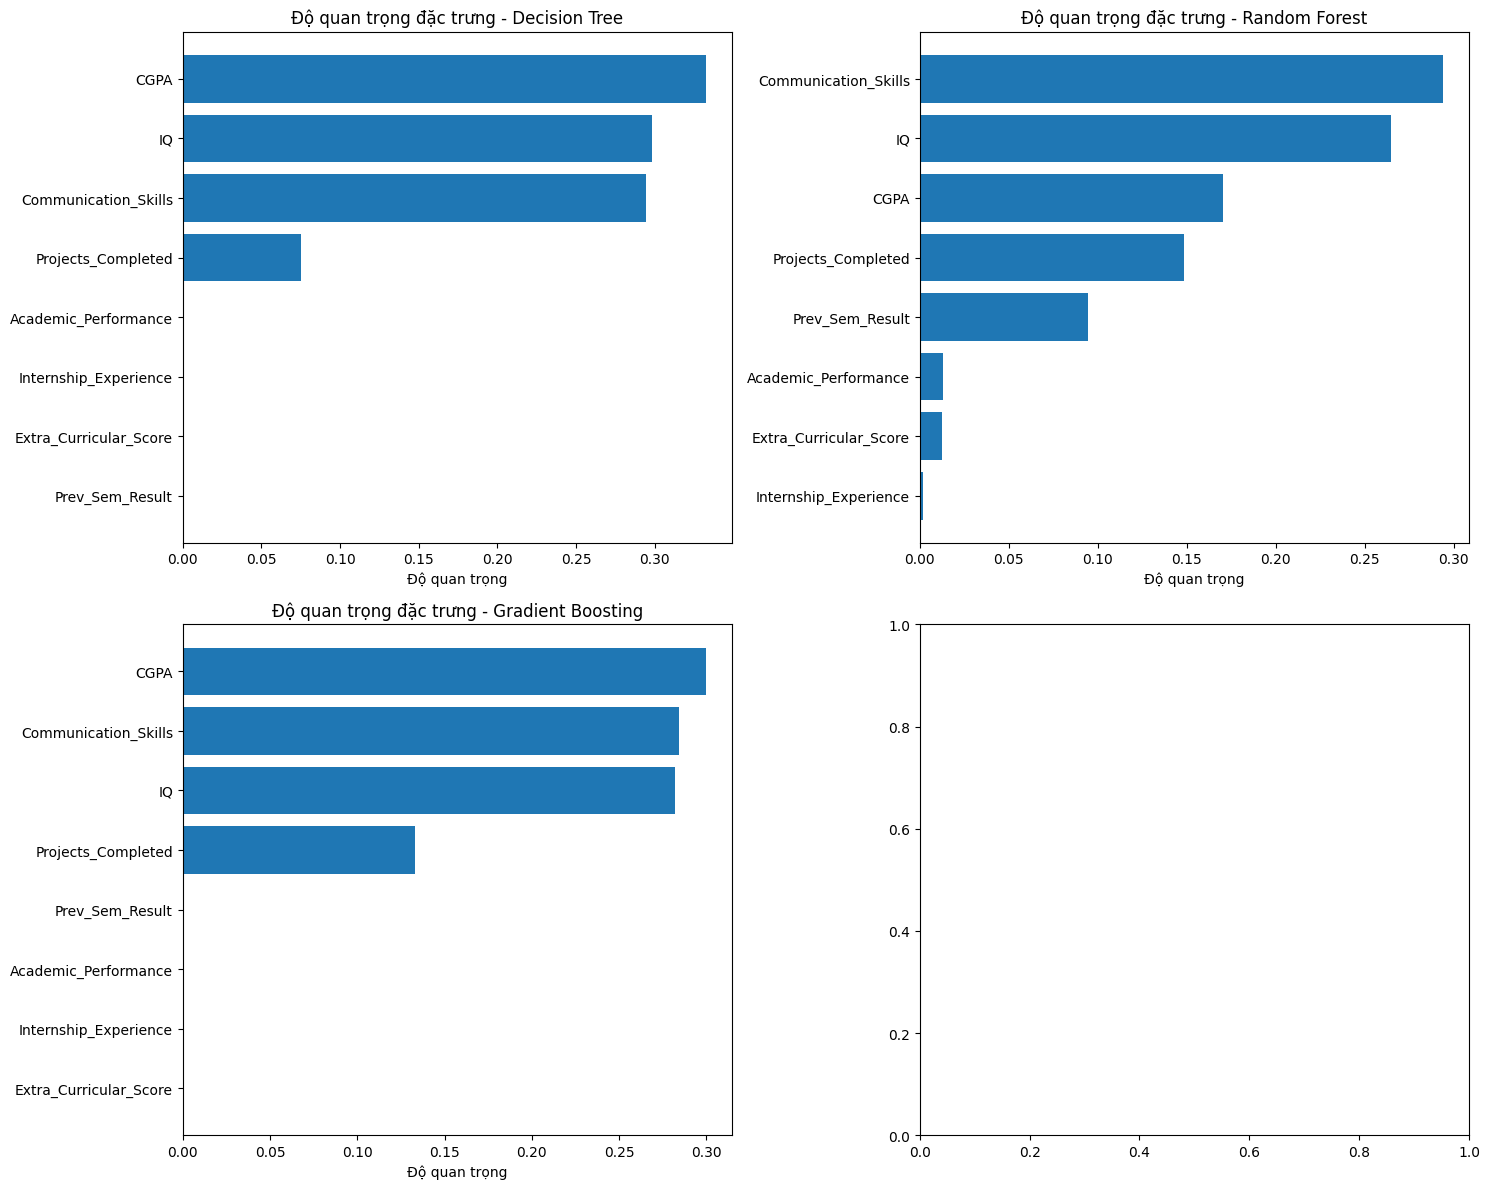

In [ ]:
# Phân tích chi tiết độ quan trọng đặc trưng từ tất cả các mô hình
import numpy as np
def plot_feature_importance(models, model_names, feature_names):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, (model, name) in enumerate(zip(models, model_names)):
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            indices = np.argsort(importance)[::-1]

            axes[i].barh(range(len(indices)), importance[indices], align='center')
            axes[i].set_yticks(range(len(indices)))
            axes[i].set_yticklabels([feature_names[j] for j in indices])
            axes[i].set_xlabel('Độ quan trọng')
            axes[i].set_title(f'Độ quan trọng đặc trưng - {name}')
            axes[i].invert_yaxis()

    plt.tight_layout()
    plt.show()

# So sánh độ quan trọng đặc trưng từ tất cả mô hình
models = [dt_model, rf_model, gb_model, nb_model]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Navie Bayes']
feature_names = X_train_final.columns

plot_feature_importance(models, model_names, feature_names)



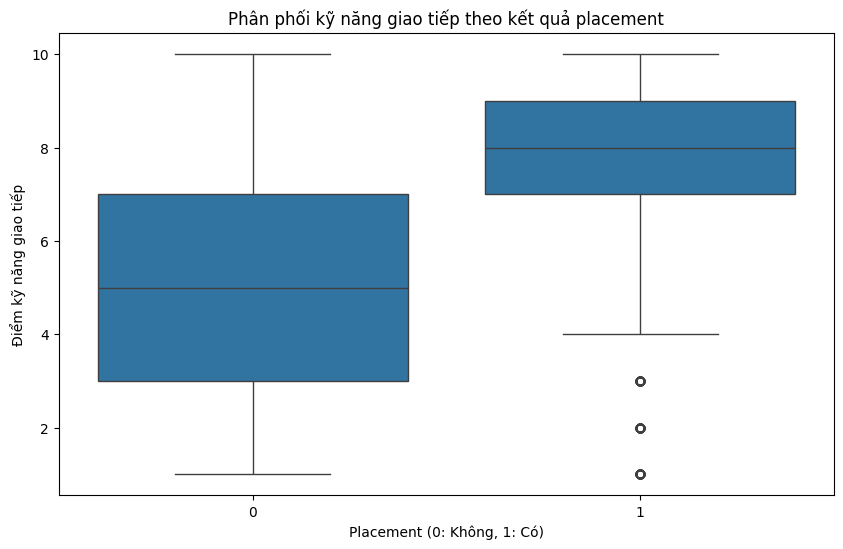

Tương quan giữa kỹ năng giao tiếp và placement: 0.323


In [ ]:
# Phân tích tương quan giữa kỹ năng giao tiếp và placement
plt.figure(figsize=(10, 6))
sns.boxplot(x='Placement', y='Communication_Skills', data=df)
plt.title('Phân phối kỹ năng giao tiếp theo kết quả placement')
plt.xlabel('Placement (0: Không, 1: Có)')
plt.ylabel('Điểm kỹ năng giao tiếp')
plt.show()

# Tính toán correlation giữa Communication_Skills và Placement
correlation = df['Communication_Skills'].corr(df['Placement'])
print(f"Tương quan giữa kỹ năng giao tiếp và placement: {correlation:.3f}")

In [ ]:
# Phân tích thống kê mô tả
print("\nThống kê mô tả kỹ năng giao tiếp theo placement:")
print(df.groupby('Placement')['Communication_Skills'].describe())


Thống kê mô tả kỹ năng giao tiếp theo placement:
            count      mean       std  min  25%  50%  75%   max
Placement                                                      
0          8341.0  5.143748  2.775852  1.0  3.0  5.0  7.0  10.0
1          1659.0  7.663653  2.586538  1.0  7.0  8.0  9.0  10.0


Độ quan trọng của các đặc trưng:
                  Feature  Importance
2                    CGPA    0.299749
6    Communication_Skills    0.284563
0                      IQ    0.282154
4      Projects_Completed    0.132981
1         Prev_Sem_Result    0.000390
5    Academic_Performance    0.000162
3  Extra_Curricular_Score    0.000000
7   Internship_Experience    0.000000


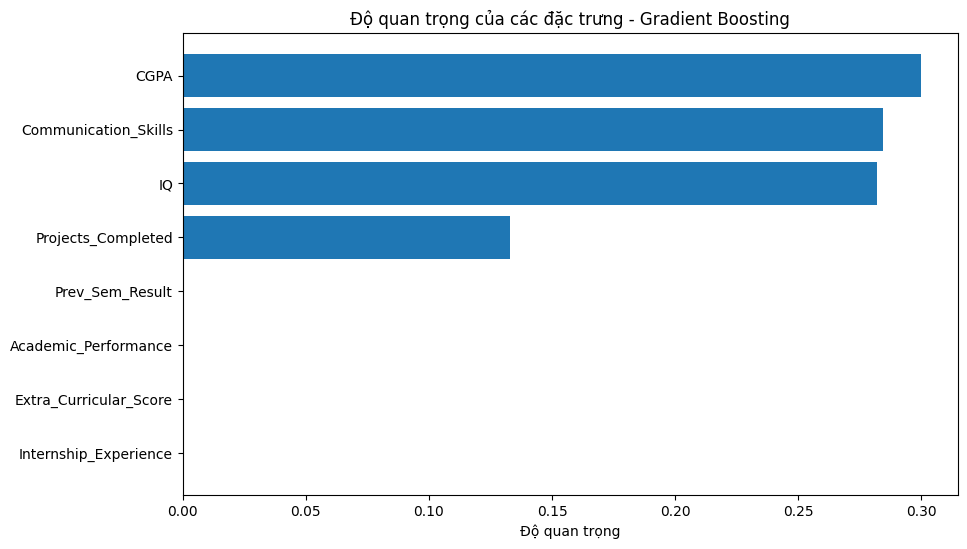

In [ ]:
# Lấy độ quan trọng đặc trưng từ mô hình Gradient Boosting (mô hình tốt nhất)
feature_importance = gb_model.feature_importances_

# Tạo DataFrame để hiển thị
feature_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': feature_importance
})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Hiển thị bảng độ quan trọng
print("Độ quan trọng của các đặc trưng:")
print(feature_importance_df)

# Trực quan hóa bằng biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Độ quan trọng')
plt.title('Độ quan trọng của các đặc trưng - Gradient Boosting')
plt.gca().invert_yaxis()  # Đảo ngược thứ tự để feature quan trọng nhất ở trên
plt.show()

# Dự đoán tỉ lệ có việc làm của sinh viên